In [89]:
import pandas as pd
import numpy as np
import re
import seaborn as sns

# df_calendar

In [6]:
df_calendar = pd.read_csv("calendar.csv")

In [7]:
df_calendar

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,167183,2021-04-15,f,$45.00,$45.00,1.0,5.0
1,6369,2021-04-15,t,$60.00,$60.00,1.0,1125.0
2,6369,2021-04-16,t,$60.00,$60.00,1.0,1125.0
3,6369,2021-04-17,t,$60.00,$60.00,1.0,1125.0
4,6369,2021-04-18,t,$60.00,$60.00,1.0,1125.0
...,...,...,...,...,...,...,...
7161251,49103093,2022-04-10,f,$28.00,$35.00,1.0,1125.0
7161252,49103093,2022-04-11,f,$28.00,$35.00,1.0,1125.0
7161253,49103093,2022-04-12,f,$28.00,$35.00,1.0,1125.0
7161254,49103093,2022-04-13,f,$28.00,$35.00,1.0,1125.0


In [8]:
df_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7161256 entries, 0 to 7161255
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   listing_id      int64  
 1   date            object 
 2   available       object 
 3   price           object 
 4   adjusted_price  object 
 5   minimum_nights  float64
 6   maximum_nights  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 382.5+ MB


# df_listings

In [131]:
df_listings = pd.read_csv("listings.csv")

In [132]:
df_listings

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,6369,"Rooftop terrace room , ensuite bathroom",13660,Simon,Chamartín,Hispanoamérica,40.45724,-3.67688,Private room,60,1,78,2020-09-20,0.58,1,180
1,21853,Bright and airy room,83531,Abdel,Latina,Cármenes,40.40381,-3.74130,Private room,31,4,33,2018-07-15,0.42,2,364
2,23001,Apartmento Arganzuela- Madrid Rio,82175,Jesus,Arganzuela,Legazpi,40.38840,-3.69511,Entire home/apt,50,15,0,NaN,NaN,7,1
3,24805,Gran Via Studio Madrid,346366726,A,Centro,Universidad,40.42183,-3.70529,Entire home/apt,92,5,10,2020-03-01,0.13,1,72
4,26825,Single Room whith private Bathroom,114340,Agustina,Arganzuela,Legazpi,40.38975,-3.69018,Private room,26,2,149,2020-03-12,1.12,1,365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19613,49185822,Habitación con TV con Netflix en Lavapiés,172011610,Belaid,Centro,Embajadores,40.40756,-3.69937,Private room,23,30,0,NaN,NaN,8,349
19614,49186179,Habitación con TV con Netflix en Gaztambide,172011610,Belaid,Chamberí,Gaztambide,40.43706,-3.71364,Private room,21,30,0,NaN,NaN,8,350
19615,49187258,Habitación con TV con Netflix en Chamberí,172011610,Belaid,Chamberí,Arapiles,40.43857,-3.70715,Private room,22,7,0,NaN,NaN,8,364
19616,49187471,Habitación con TV con Netflix en Goya,172011610,Belaid,Salamanca,Guindalera,40.43027,-3.66759,Private room,19,30,0,NaN,NaN,8,349


In [133]:
df_listings.shape

(19618, 16)

In [134]:
df_listings.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

# df_listing_detailed

In [186]:
df_listings_detailed = pd.read_csv("listings_detailed.csv")

In [187]:
df_listings_detailed

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,6369,https://www.airbnb.com/rooms/6369,20210413152844,2021-04-15,"Rooftop terrace room , ensuite bathroom",Excellent connection with the AIRPORT and EXHI...,NaN,https://a0.muscache.com/pictures/683224/4cc318...,13660,https://www.airbnb.com/users/show/13660,...,10.0,10.0,10.0,NaN,f,1,0,1,0,0.58
1,21853,https://www.airbnb.com/rooms/21853,20210413152844,2021-04-16,Bright and airy room,We have a quiet and sunny room with a good vie...,We live in a leafy neighbourhood with plenty o...,https://a0.muscache.com/pictures/68483181/87bc...,83531,https://www.airbnb.com/users/show/83531,...,10.0,8.0,9.0,NaN,f,2,0,2,0,0.42
2,23001,https://www.airbnb.com/rooms/23001,20210413152844,2021-04-16,Apartmento Arganzuela- Madrid Rio,"Apartamento de tres dormitorios dobles, gran s...","Barrio Arganzuela, junto a Madrid Rio, zonas c...",https://a0.muscache.com/pictures/58e6a770-509c...,82175,https://www.airbnb.com/users/show/82175,...,NaN,NaN,NaN,NaN,f,7,6,1,0,NaN
3,24805,https://www.airbnb.com/rooms/24805,20210413152844,2021-04-15,Gran Via Studio Madrid,"Studio located 50 meters from Gran Via, next t...","The area is next to the Gran Via, so people li...",https://a0.muscache.com/pictures/miso/Hosting-...,346366726,https://www.airbnb.com/users/show/346366726,...,10.0,10.0,10.0,NaN,t,1,1,0,0,0.13
4,26825,https://www.airbnb.com/rooms/26825,20210413152844,2021-04-15,Single Room whith private Bathroom,Nice and cozy roon for one person with a priva...,"Es un barrio muy tranquilo, en una zona de Mad...",https://a0.muscache.com/pictures/149358/218d5b...,114340,https://www.airbnb.com/users/show/114340,...,9.0,9.0,9.0,NaN,f,1,0,1,0,1.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19613,49185822,https://www.airbnb.com/rooms/49185822,20210413152844,2021-04-15,Habitación con TV con Netflix en Lavapiés,"*facturas incluidas (gas, electricidad, intern...",NaN,https://a0.muscache.com/pictures/59be7fbb-28b3...,172011610,https://www.airbnb.com/users/show/172011610,...,NaN,NaN,NaN,NaN,f,8,0,8,0,NaN
19614,49186179,https://www.airbnb.com/rooms/49186179,20210413152844,2021-04-16,Habitación con TV con Netflix en Gaztambide,"*facturas incluidas (gas, electricidad, intern...",NaN,https://a0.muscache.com/pictures/62d916ba-bea9...,172011610,https://www.airbnb.com/users/show/172011610,...,NaN,NaN,NaN,NaN,f,8,0,8,0,NaN
19615,49187258,https://www.airbnb.com/rooms/49187258,20210413152844,2021-04-15,Habitación con TV con Netflix en Chamberí,"*facturas incluidas (gas, electricidad, Intern...",NaN,https://a0.muscache.com/pictures/be000599-44d6...,172011610,https://www.airbnb.com/users/show/172011610,...,NaN,NaN,NaN,NaN,f,8,0,8,0,NaN
19616,49187471,https://www.airbnb.com/rooms/49187471,20210413152844,2021-04-15,Habitación con TV con Netflix en Goya,"*facturas incluidas (gas, electricidad, intern...",NaN,https://a0.muscache.com/pictures/ffbecf79-945e...,172011610,https://www.airbnb.com/users/show/172011610,...,NaN,NaN,NaN,NaN,f,8,0,8,0,NaN


## General features

In [188]:
df_listings_detailed.shape

(19618, 74)

In [189]:
df_listings_detailed.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

In [190]:
df_listings_detailed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19618 entries, 0 to 19617
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            19618 non-null  int64  
 1   listing_url                                   19618 non-null  object 
 2   scrape_id                                     19618 non-null  int64  
 3   last_scraped                                  19618 non-null  object 
 4   name                                          19615 non-null  object 
 5   description                                   18480 non-null  object 
 6   neighborhood_overview                         11556 non-null  object 
 7   picture_url                                   19617 non-null  object 
 8   host_id                                       19618 non-null  int64  
 9   host_url                                      19618 non-null 

In [191]:
df_listings_detailed.describe().T

,count,mean,std,min,25%,50%,75%,max
id,19618.0,2.912200e+07,1.351839e+07,6.369000e+03,1.903424e+07,3.187506e+07,4.090994e+07,4.918779e+07
scrape_id,19618.0,2.021041e+13,6.547042e+00,2.021041e+13,2.021041e+13,2.021041e+13,2.021041e+13,2.021041e+13
host_id,19618.0,1.312165e+08,1.166790e+08,7.952000e+03,2.765313e+07,9.901898e+07,2.256898e+08,3.964281e+08
host_listings_count,19091.0,1.211456e+01,1.018038e+02,0.000000e+00,1.000000e+00,2.000000e+00,6.000000e+00,7.755000e+03
host_total_listings_count,19091.0,1.211456e+01,1.018038e+02,0.000000e+00,1.000000e+00,2.000000e+00,6.000000e+00,7.755000e+03
latitude,19618.0,4.042098e+01,2.262693e-02,4.033221e+01,4.040939e+01,4.041974e+01,4.043029e+01,4.056274e+01
longitude,19618.0,-3.694040e+00,2.867129e-02,-3.863910e+00,-3.707700e+00,-3.701120e+00,-3.685420e+00,-3.531900e+00
accommodates,19618.0,3.110154e+00,1.963693e+00,0.000000e+00,2.000000e+00,2.000000e+00,4.000000e+00,1.600000e+01
bathrooms,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bedrooms,18123.0,1.440821e+00,8.293693e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.500000e+01


## Working the column "price"

In [192]:
df_listings_detailed["price"].unique()

array(['$60.00', '$31.00', '$50.00', '$92.00', '$26.00', '$85.00',
       '$65.00', '$54.00', '$1,400.00', '$79.00', '$90.00', '$82.00',
       '$40.00', '$24.00', '$21.00', '$51.00', '$75.00', '$139.00',
       '$80.00', '$63.00', '$46.00', '$125.00', '$114.00', '$70.00',
       '$45.00', '$19.00', '$96.00', '$105.00', '$20.00', '$32.00',
       '$44.00', '$148.00', '$30.00', '$69.00', '$91.00', '$120.00',
       '$72.00', '$18.00', '$55.00', '$28.00', '$214.00', '$94.00',
       '$101.00', '$25.00', '$43.00', '$61.00', '$88.00', '$95.00',
       '$67.00', '$64.00', '$110.00', '$68.00', '$71.00', '$59.00',
       '$175.00', '$106.00', '$37.00', '$89.00', '$172.00', '$200.00',
       '$87.00', '$35.00', '$77.00', '$166.00', '$223.00', '$100.00',
       '$42.00', '$56.00', '$140.00', '$58.00', '$57.00', '$103.00',
       '$49.00', '$15.00', '$121.00', '$74.00', '$76.00', '$38.00',
       '$97.00', '$48.00', '$84.00', '$17.00', '$34.00', '$300.00',
       '$99.00', '$134.00', '$78.00', '

In [142]:
def price_to_float(data, column = "price"):
    '''It cleans the column price of the dataframe and casts it to a float'''
    
    # Getting rid of "$"
    data[column] = [i.strip("$") for i in data[column].values]
    
    # Replacing ","
    data[column] = data[column].apply(lambda x: x.replace(',', '') if pd.notnull(x) else x)
    
    # Replacing "."
    data[column] = data[column].apply(lambda x: x.replace('.', '') if pd.notnull(x) else x)
    
    # Cast to float
    data[column] = data[column].apply(lambda x: float(x) if pd.notnull(x) else x)
    
    # Divide by 100 to get the original number
    data[column] = data[column].apply(lambda x: x/100 if pd.notnull(x) else x)
    

In [143]:
price_to_float(data =df_listings_detailed, column = "price")

In [144]:
df_listings_detailed["price"].unique()

array([6.000e+01, 3.100e+01, 5.000e+01, 9.200e+01, 2.600e+01, 8.500e+01,
       6.500e+01, 5.400e+01, 1.400e+03, 7.900e+01, 9.000e+01, 8.200e+01,
       4.000e+01, 2.400e+01, 2.100e+01, 5.100e+01, 7.500e+01, 1.390e+02,
       8.000e+01, 6.300e+01, 4.600e+01, 1.250e+02, 1.140e+02, 7.000e+01,
       4.500e+01, 1.900e+01, 9.600e+01, 1.050e+02, 2.000e+01, 3.200e+01,
       4.400e+01, 1.480e+02, 3.000e+01, 6.900e+01, 9.100e+01, 1.200e+02,
       7.200e+01, 1.800e+01, 5.500e+01, 2.800e+01, 2.140e+02, 9.400e+01,
       1.010e+02, 2.500e+01, 4.300e+01, 6.100e+01, 8.800e+01, 9.500e+01,
       6.700e+01, 6.400e+01, 1.100e+02, 6.800e+01, 7.100e+01, 5.900e+01,
       1.750e+02, 1.060e+02, 3.700e+01, 8.900e+01, 1.720e+02, 2.000e+02,
       8.700e+01, 3.500e+01, 7.700e+01, 1.660e+02, 2.230e+02, 1.000e+02,
       4.200e+01, 5.600e+01, 1.400e+02, 5.800e+01, 5.700e+01, 1.030e+02,
       4.900e+01, 1.500e+01, 1.210e+02, 7.400e+01, 7.600e+01, 3.800e+01,
       9.700e+01, 4.800e+01, 8.400e+01, 1.700e+01, 

<AxesSubplot:xlabel='price', ylabel='count'>

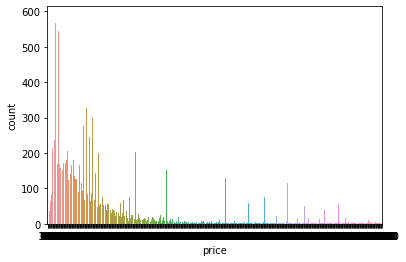

In [165]:
sns.countplot(x = df_listings_detailed["price"])

<AxesSubplot:xlabel='price', ylabel='Density'>

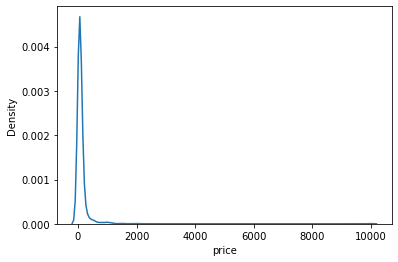

In [145]:
sns.kdeplot(x = df_listings_detailed["price"])

<AxesSubplot:xlabel='price', ylabel='Count'>

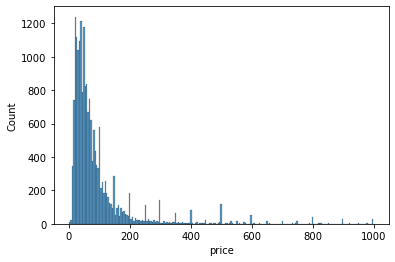

In [149]:
sns.histplot(x = df_listings_detailed["price"][df_listings_detailed["price"]<1000])

## Working with the column "neighbourhood"

In [154]:
df_listings_detailed["neighbourhood"].unique()

array([nan, 'Madrid, Spain', 'Madrid, Comunidad de Madrid, Spain',
       'Madrid, Community of Madrid, Spain', 'Madrid, Spain, Spain',
       'Madrid, Comunidad de  Madrid, Spain',
       'Centro, Madrid, Community of Madrid, Spain',
       'las matas  madrid, Community of Madrid, Spain',
       'Madrid , Madrid, Spain', 'Madrid, madrid, Spain',
       'madrid, Comunidad de Madrid, Spain', 'Madrid, MADRID, Spain',
       'Madrid , Comunidad de Madrid, Spain',
       'Apartment 3-I, Madrid, Spain',
       'Madrid, Comunidad de Madrid, ES, Madrid, Spain',
       '马德里, 马德里自治区, Spain',
       'Pozuelo de Alarcón, Comunidad de Madrid, Spain',
       'Madrid, Palos de Moguer , Spain',
       'Madrid, Comunidad de Madrid, ES, madrid, Spain',
       'Madrid, Comunidad de Madrid , Atocha, Spain',
       'Madrid, La Latina/Palacio , Madrid, Spain',
       'Chueca, Comunidad de Madrid, Spain',
       'Las Rozas, Comunidad de Madrid, Spain',
       'Madrid Center, Madrid, Spain', 'MADRID, Spain, 

In [156]:
df_listings_detailed["neighbourhood_cleansed"].unique()

array(['Hispanoamérica', 'Cármenes', 'Legazpi', 'Universidad', 'Sol',
       'Embajadores', 'Palacio', 'Justicia', 'Goya', 'Peñagrande',
       'Recoletos', 'Palomeras Bajas', 'Valverde', 'Pueblo Nuevo',
       'Almagro', 'Rios Rosas', 'Cortes', 'Los Angeles', 'Trafalgar',
       'Piovera', 'Castellana', 'Casa de Campo', 'Abrantes', 'Canillas',
       'Arapiles', 'Opañel', 'Valdefuentes', 'Delicias', 'Ciudad Jardín',
       'Almenara', 'Fuente del Berro', 'Niño Jesús', 'Acacias',
       'Entrevías', 'Lista', 'Cuatro Caminos', 'Lucero', 'Comillas',
       'La Paz', 'Rosas', 'Puerta del Angel', 'Jerónimos', 'Concepción',
       'Arcos', 'Pacífico', 'Palos de Moguer', 'Costillares',
       'Gaztambide', 'Ibiza', 'Casco Histórico de Vallecas',
       'Casco Histórico de Barajas', 'San Fermín', 'Berruguete',
       'Aravaca', 'San Diego', 'Prosperidad', 'Castilla', 'Puerta Bonita',
       'Pinar del Rey', 'Bellas Vistas', 'El Viso', 'Alameda de Osuna',
       'Vallehermoso', 'Argüelles', 'C

In [162]:
df_listings_detailed["neighbourhood_cleansed"].value_counts()

Embajadores      2318
Universidad      1869
Palacio          1506
Sol              1125
Justicia          951
                 ... 
Valdemarín          5
Fuentelareina       5
El Pardo            3
Horcajo             2
Atalaya             1
Name: neighbourhood_cleansed, Length: 128, dtype: int64

<AxesSubplot:xlabel='neighbourhood_cleansed', ylabel='Count'>

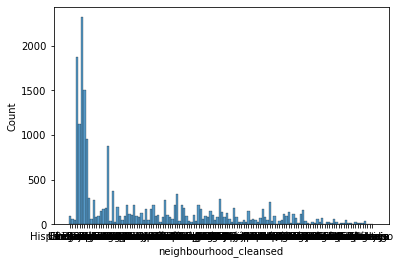

In [159]:
sns.histplot(x = df_listings_detailed["neighbourhood_cleansed"])

In [157]:
df_listings_detailed["neighbourhood_group_cleansed"].unique()

array(['Chamartín', 'Latina', 'Arganzuela', 'Centro', 'Salamanca',
       'Fuencarral - El Pardo', 'Puente de Vallecas', 'Ciudad Lineal',
       'Chamberí', 'Villaverde', 'Hortaleza', 'Moncloa - Aravaca',
       'Carabanchel', 'Tetuán', 'Retiro', 'San Blas - Canillejas',
       'Villa de Vallecas', 'Barajas', 'Usera', 'Moratalaz', 'Vicálvaro'],
      dtype=object)

In [161]:
df_listings_detailed["neighbourhood_group_cleansed"].value_counts()

Centro                   8649
Salamanca                1324
Chamberí                 1252
Arganzuela               1104
Tetuán                    816
Carabanchel               708
Retiro                    664
Ciudad Lineal             649
Puente de Vallecas        617
Latina                    608
Chamartín                 580
Moncloa - Aravaca         554
San Blas - Canillejas     497
Hortaleza                 364
Fuencarral - El Pardo     315
Usera                     280
Villaverde                177
Barajas                   172
Moratalaz                 118
Villa de Vallecas          98
Vicálvaro                  72
Name: neighbourhood_group_cleansed, dtype: int64

<AxesSubplot:xlabel='neighbourhood_group_cleansed', ylabel='Count'>

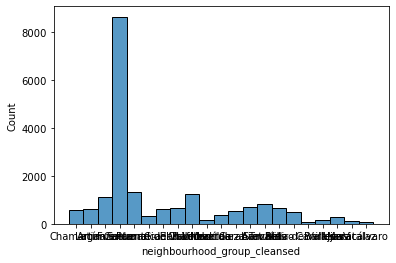

In [160]:
sns.histplot(x = df_listings_detailed["neighbourhood_group_cleansed"])

In [172]:
df_num = df_listings_detailed._get_numeric_data().copy()
df_num.head(3)

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,6369,20210413152844,13660,1.0,1.0,40.45724,-3.67688,2,NaN,1.0,...,10.0,10.0,10.0,10.0,10.0,1,0,1,0,0.58
1,21853,20210413152844,83531,2.0,2.0,40.40381,-3.74130,1,NaN,1.0,...,9.0,10.0,10.0,8.0,9.0,2,0,2,0,0.42
2,23001,20210413152844,82175,10.0,10.0,40.38840,-3.69511,6,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,7,6,1,0,NaN


In [171]:
df_cat = df_listings_detailed.drop(df_num.columns, axis = 1)
df_cat.head(3)

,listing_url,last_scraped,name,description,neighborhood_overview,picture_url,host_url,host_name,host_since,host_location,...,property_type,room_type,bathrooms_text,amenities,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
0,https://www.airbnb.com/rooms/6369,2021-04-15,"Rooftop terrace room , ensuite bathroom",Excellent connection with the AIRPORT and EXHI...,NaN,https://a0.muscache.com/pictures/683224/4cc318...,https://www.airbnb.com/users/show/13660,Simon,2009-04-16,"Madrid, Madrid, Spain",...,Private room in apartment,Private room,1 shared bath,"[""Kitchen"", ""Elevator"", ""Extra pillows and bla...",t,2021-04-15,2010-03-14,2020-09-20,NaN,f
1,https://www.airbnb.com/rooms/21853,2021-04-16,Bright and airy room,We have a quiet and sunny room with a good vie...,We live in a leafy neighbourhood with plenty o...,https://a0.muscache.com/pictures/68483181/87bc...,https://www.airbnb.com/users/show/83531,Abdel,2010-02-21,"Madrid, Madrid, Spain",...,Private room in apartment,Private room,1 bath,"[""Bed linens"", ""Refrigerator"", ""Dishes and sil...",t,2021-04-16,2014-10-10,2018-07-15,NaN,f
2,https://www.airbnb.com/rooms/23001,2021-04-16,Apartmento Arganzuela- Madrid Rio,"Apartamento de tres dormitorios dobles, gran s...","Barrio Arganzuela, junto a Madrid Rio, zonas c...",https://a0.muscache.com/pictures/58e6a770-509c...,https://www.airbnb.com/users/show/82175,Jesus,2010-02-17,"Madrid, Community of Madrid, Spain",...,Entire apartment,Entire home/apt,2 baths,"[""Pool"", ""Dishwasher"", ""Bed linens"", ""Refriger...",t,2021-04-16,NaN,NaN,NaN,f


# df_neighbourhood

In [163]:
df_neighbourhood = pd.read_csv("neighbourhoods.csv")

In [164]:
df_neighbourhood

,neighbourhood_group,neighbourhood
0,Arganzuela,Acacias
1,Arganzuela,Atocha
2,Arganzuela,Chopera
3,Arganzuela,Delicias
4,Arganzuela,Imperial
...,...,...
123,Villaverde,Butarque
124,Villaverde,Los Angeles
125,Villaverde,Los Rosales
126,Villaverde,San Andrés


# df_reviews

In [13]:
df_reviews = pd.read_csv("reviews.csv")

In [14]:
df_reviews

,listing_id,date
0,6369,2010-03-14
1,6369,2010-03-23
2,6369,2010-04-10
3,6369,2010-04-21
4,6369,2010-04-26
...,...,...
625001,48990543,2021-04-14
625002,48991692,2021-04-04
625003,48992883,2021-04-11
625004,48992883,2021-04-12


In [15]:
df_reviews_detailed = pd.read_csv("reviews_detailed.csv")

In [16]:
df_reviews_detailed

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,6369,29428,2010-03-14,84790,Nancy,Simon and Arturo have the ultimate location in...
1,6369,31018,2010-03-23,84338,David,Myself and Kristy originally planned on stayin...
2,6369,34694,2010-04-10,98655,Marion,We had a great time at Arturo and Simon's ! A ...
3,6369,37146,2010-04-21,109871,Kurt,I very much enjoyed the stay. \r\nIt's a wond...
4,6369,38168,2010-04-26,98901,Dennis,Arturo and Simon are polite and friendly hosts...
...,...,...,...,...,...,...
625001,48990543,748625626,2021-04-14,133082364,Neus,"Ubicación genial, en el maravilloso barrio de ..."
625002,48991692,745277975,2021-04-04,104936627,Irene,Muy buena atención y alojamiento muy cómodo.
625003,48992883,747729871,2021-04-11,196731765,Teodoro,muy buena comunicación y limpieza
625004,48992883,748199100,2021-04-12,266607018,Gerson,great spot great location jorge is very attentive
